In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib.dates import DateFormatter, ConciseDateFormatter
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker

import seaborn as sns  #画密度图

In [2]:
key_Data = pd.read_csv('Key_Data.csv')
V0 = pd.read_csv('regression_variables.csv')
thd = 0
print(len(V0))
thd = 1990
V2000 = V0['mentee_id'][V0.birthYear_mte<=thd]
key_Data = key_Data[(key_Data.paper_num_mte>0)&(key_Data.mentee_id.isin(V2000))]

49628


In [3]:
# key_Data = pd.read_csv('Key_Data.csv')

In [4]:
data = key_Data[['mentee_id','mentor_id','community','paper_num_mte','paper_num_mto','communitys_paper_num_mto','type']].reset_index()

In [5]:
data['paper_ratio_in_communities_mto'] = data['paper_num_mto']/data['communitys_paper_num_mto']

In [6]:
data.head(5)

,index,mentee_id,mentor_id,community,paper_num_mte,paper_num_mto,communitys_paper_num_mto,type,paper_ratio_in_communities_mto
0,14,A2141337483,A328693186,0.0,4,70,180,main,0.388889
1,16,A2141337483,A328693186,4.0,19,0,180,new,0.000000
2,17,A2141337483,A328693186,3.0,1,32,180,associate,0.177778
3,22,A3010849663,A240727783,5.0,23,1,363,associate,0.002755
4,23,A3010849663,A240727783,2.0,53,47,363,main,0.129477


In [7]:
data = data[data.paper_num_mte>0]

In [8]:
type_colors = {'all':'k','main':'#fc8d62','asso':'#66c2a5','new':'grey'}

In [9]:
def type_count(tp_df,attri):
    num = len(tp_df[tp_df.type==attri])
    return num

num_main = data.groupby(['mentee_id','mentor_id']).apply(type_count,attri='main').reset_index(name='num_main')
num_asso = data.groupby(['mentee_id','mentor_id']).apply(type_count,attri='associate').reset_index(name='num_asso')
num_new = data.groupby(['mentee_id','mentor_id']).apply(type_count,attri='new').reset_index(name='num_new')
num_type = num_main.merge(num_asso,on=['mentee_id','mentor_id'],how='left')
num_type = num_type.merge(num_new,on=['mentee_id','mentor_id'],how='left')

In [10]:
num_type.head(5)

,mentee_id,mentor_id,num_main,num_asso,num_new
0,A1002422011,A1897971127,1,1,0
1,A1002422011,A1966502692,1,1,0
2,A100328954,A1993268291,0,1,3
3,A100328954,A2157074446,1,2,1
4,A100328954,A2780364925,0,1,3


In [11]:
n = len(num_type)

mean_main = np.mean(num_type.num_main)
std_main = np.std(num_type.num_main)
stdError_main = np.std(num_type.num_main)/np.sqrt(n)
print('primary:',mean_main,std_main,stdError_main)

mean_asso = np.mean(num_type.num_asso)
std_asso = np.std(num_type.num_asso)
stdError_asso = np.std(num_type.num_asso)/np.sqrt(n)
print('secondary:',mean_asso,std_asso,stdError_asso)

mean_new = np.mean(num_type.num_new)
std_new = np.std(num_type.num_new)
stdError_new = np.std(num_type.num_new)/np.sqrt(n)
print('new:',mean_new,std_new,stdError_new)

primary: 1.0268745450133463 0.8934735517396585 0.006959057073291281
secondary: 1.3070249939335112 1.0563803704731531 0.008227900283017358
new: 1.3986289735501092 1.5359402374226314 0.011963080219416656


#### Elite

In [12]:
key_data_0 = pd.read_csv('Key_Data.csv')
print(key_data_0.shape)
V20 = V0['mentee_id'][V0.birthYear_mte<=thd]
key_data_0 = key_data_0[(key_data_0.paper_num_mte>0)&(key_data_0.mentee_id.isin(V20))]
print(len(set(key_data_0.mentee_id)))

(236104, 25)
11436


In [13]:
V0['yearly_cits5_mte'] = V0['total_cits5_mte']/V0['career_len_mte']

In [14]:
q80_total_cits5 = V0[['yearly_cits5_mte','total_cits5_mte']].quantile([0.25,0.80]).total_cits5_mte.tolist()[1]
print(q80_total_cits5)

4331.200000000012


In [15]:
# V0_elite = V0['mentee_id'][V0.yearly_cits5_mte>=169]
V0_elite = V0['mentee_id'][V0.total_cits5_mte>=q80_total_cits5]
key_data_tp = key_data_0[key_data_0.mentee_id.isin(V0_elite)]

In [17]:
elite_mentee = list(set(key_data_tp.mentee_id))

In [18]:
num_type_elite = num_type[num_type.mentee_id.isin(elite_mentee)]

In [19]:
n = len(num_type_elite)

mean_main_elite = np.mean(num_type_elite.num_main)
std_main_elite = np.std(num_type_elite.num_main)
stdError_main_elite = np.std(num_type_elite.num_main)/np.sqrt(n)
print('primary:',mean_main_elite,std_main_elite,stdError_main_elite)

mean_asso_elite = np.mean(num_type_elite.num_asso)
std_asso_elite = np.std(num_type_elite.num_asso)
stdError_asso_elite = np.std(num_type_elite.num_asso)/np.sqrt(n)
print('secondary:',mean_asso_elite,std_asso_elite,stdError_asso_elite)

mean_new_elite = np.mean(num_type_elite.num_new)
std_new_elite = np.std(num_type_elite.num_new)
stdError_new_elite = np.std(num_type_elite.num_new)/np.sqrt(n)
print('new:',mean_new_elite,std_new_elite,stdError_new_elite)

primary: 1.1360432715948205 0.8915164170177747 0.011413762528424683
secondary: 1.6325192591378463 1.1661024041982955 0.014929187697817882
new: 1.9704966398950992 1.9108421487964324 0.02446382152851862


#### mannwhitneyu test

In [20]:
from scipy import stats

##### All

In [21]:
data1 = num_type.num_main
data2 = num_type.num_asso
u_statistic, p_value = stats.mannwhitneyu(data1, data2)
print(u_statistic,p_value)

116904411.5 3.029189129196788e-119


In [22]:
# data1 = num_type.num_main
# data2 = num_type.num_asso
# # 两组数据（用你自己的数据替换）
# group1 = data1
# group2 = data2

# # 计算均值和标准误差
# mean1, se1 = np.mean(group1), stats.sem(group1)
# mean2, se2 = np.mean(group2), stats.sem(group2)

# # 计算均值差异的置信区间
# diff_mean = mean1 - mean2
# se_diff = np.sqrt(se1**2 + se2**2)
# conf_interval = stats.norm.interval(0.95, loc=diff_mean, scale=se_diff)

# # 输出结果
# print(f"均值差异：{diff_mean}")
# print(f"置信区间：{conf_interval}")

# # 判断是否存在显著差异
# if conf_interval[0] * conf_interval[1] > 0:
#     print("在显著性水平为 0.05 下，两组数据的均值存在显著差异")
# else:
#     print("在显著性水平为 0.05 下，两组数据的均值没有显著差异")
    
# conf_interval = stats.norm.interval(0.995, loc=diff_mean, scale=se_diff)
# print(f"置信区间：{conf_interval}")
# # 判断是否存在显著差异
# if conf_interval[0] * conf_interval[1] > 0:
#     print("在显著性水平为 0.005 下，两组数据的均值存在显著差异")
# else:
#     print("在显著性水平为 0.005 下，两组数据的均值没有显著差异")

##### Elite

In [23]:
data1 = num_type_elite.num_main
data2 = num_type_elite.num_asso
u_statistic, p_value = stats.mannwhitneyu(data1, data2)
print(u_statistic,p_value)

14209416.5 7.919188368672843e-126


In [24]:
data1 = num_type_elite.num_main
data2 = num_type_elite.num_new
u_statistic, p_value = stats.mannwhitneyu(data1, data2)
print(u_statistic,p_value)

14190500.5 2.2460280016627567e-122


In [25]:
data1 = num_type_elite.num_asso
data2 = num_type_elite.num_new
u_statistic, p_value = stats.mannwhitneyu(data1, data2)
print(u_statistic,p_value)

17730190.5 3.169044410483744e-06


In [26]:
num_type.head(5)

,mentee_id,mentor_id,num_main,num_asso,num_new
0,A1002422011,A1897971127,1,1,0
1,A1002422011,A1966502692,1,1,0
2,A100328954,A1993268291,0,1,3
3,A100328954,A2157074446,1,2,1
4,A100328954,A2780364925,0,1,3


In [27]:
len(num_type)

16484

In [28]:
len(num_type_elite)

6101

In [29]:
num_type[num_type.mentee_id.isin(num_type_elite.mentee_id)]

,mentee_id,mentor_id,num_main,num_asso,num_new
2,A100328954,A1993268291,0,1,3
3,A100328954,A2157074446,1,2,1
4,A100328954,A2780364925,0,1,3
8,A101230078,A2153512563,0,0,2
9,A101307478,A2100073383,1,3,2
...,...,...,...,...,...
16465,A97510631,A718104186,0,1,3
16466,A9754193,A164744527,1,6,3
16468,A9784356,A186838187,2,2,0
16469,A97861387,A2152203782,2,3,1


##### catplot

create data

In [30]:
data_v_main = num_type[['mentee_id','num_main']]
data_v_main['type'] = 'primary'
data_v_main = data_v_main.rename(columns={'num_main':'num'})

data_v_asso = num_type[['mentee_id','num_asso']]
data_v_asso['type'] = 'secondary'
data_v_asso = data_v_asso.rename(columns={'num_asso':'num'})

data_v_new = num_type[['mentee_id','num_new']]
data_v_new['type'] = 'new'
data_v_new = data_v_new.rename(columns={'num_new':'num'})

data_v = pd.concat((data_v_main,data_v_asso))
data_v = pd.concat((data_v,data_v_new))
data_v = data_v.reset_index()
data_v['All_Elite'] = 'All'
data_v['All_Elite'][data_v.mentee_id.isin(elite_mentee)]='Elite'

/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_50056/31375169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v_main['type'] = 'primary'
/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_50056/31375169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_v_asso['type'] = 'secondary'
/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_50056/31375169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

/Users/yanmemgxing/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/8n/d3_ymw7s7tn0tz9t554ghv5m0000gn/T/ipykernel_50056/1319737211.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


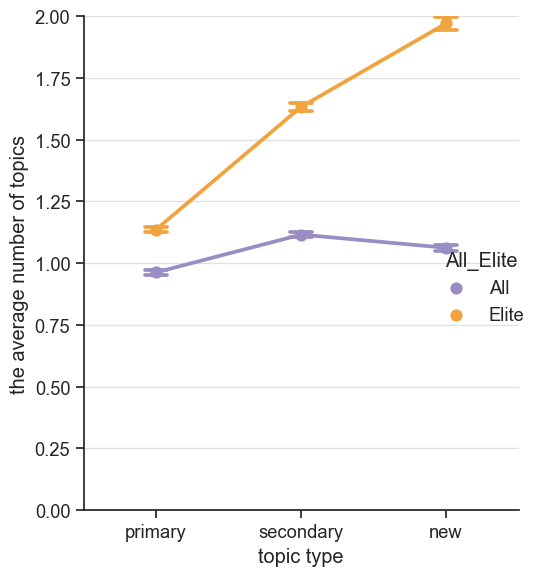

In [34]:
# sns.set_theme(style="whitegrid")
# Draw a pointplot to show pulse as a function of three categorical factors
#figure layout set
# fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.618*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')
# 自定义颜色列表
custom_palette = ['#998ec3','#f1a340']

g = sns.catplot(
    data=data_v, x="type", y="num", hue="All_Elite", 
    capsize=.15, palette=custom_palette, errorbar="se",
    kind="point", height=6, aspect=.75)

# g = sns.catplot(
#     data=data_v, x="type", y="num", hue="All_Elite", 
#     palette="YlGnBu_d", errorbar="se",
#     kind="box", height=6, aspect=.75,
# )
# g.despine(left=True)
# plt.ylim([0,2])
# ax.yaxis.set_major_locator(MultipleLocator(0.2))
# ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.ylim([0.0,2.0])
plt.ylabel('the average number of topics')
plt.xlabel('topic type')
plt.grid(axis='y',alpha=0.6)
plt.tight_layout()
# plt.savefig('result_data_plot/new_plot(202403)/topic_num(catplot0530).pdf')